<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

Hypothesis from group:
We can accurately tell the person’s location(s) based on cell tower usage - Shemika
The time of day can predict the type of communication used - Prapakarn
We can predict the recipient of a transmission based on cell location, time of day, and communication method - Fabien
We can predict the recipient of a transmission based on cell location and time of day

In [ ]:
# SL will be reviewing: Can we accurately tell the person’s location(s)
# based on cell tower usage?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/anaconda/envs/py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
import folium

In [7]:
df = pd.read_csv("../eda-telecomm_group_project-lab/datasets/metadata.csv")


In [8]:
df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [9]:
df.tail()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
10471,50501015388B9,REDFERN TE,NaN,4/1/15 22:40,Internet,-33.892933,151.202296
10472,50501015388B9,REDFERN TE,NaN,4/1/15 22:41,Internet,-33.892933,151.202296
10473,50501015388B9,REDFERN TE,NaN,4/1/15 22:44,Internet,-33.892933,151.202296
10474,50501015388B9,REDFERN TE,NaN,4/1/15 22:45,Internet,-33.892933,151.202296
10475,50501015388B9,REDFERN TE,NaN,4/1/15 23:49,Internet,-33.892933,151.202296


In [10]:
df.shape

(10476, 7)

In [46]:
# df.describe() #not useful since it pulls long/lat which you cant sum

In [50]:
df.info() #Comm Identifier - 1374 non-null object
          #so if common identifer is linked to phone then there are
          #probably only 1374 times phone was used
          #used isnull below and found that the comm ident missing is 
          # 9102 which when added with above value equals total columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [58]:
df.isnull() 
df.isnull().sum()  #no data is missing (see above about common ident.)

Cell Cgi                   0
Cell Tower Location        0
Comm Identifier         9102
Comm Timedate String       0
Comm Type                  0
Latitude                   0
Longitude                  0
dtype: int64

In [171]:
df.groupby(["Comm Type","Comm Timedate String"]).count()

Cell Cgi  Cell Tower Location  \
Comm Type Comm Timedate String                                  
Internet  1/1/15 0:19                  2                    2   
          1/1/15 0:20                  1                    1   
          1/1/15 10:01                 2                    2   
          1/1/15 10:03                 6                    6   
          1/1/15 10:04                 2                    2   
          1/1/15 10:06                 1                    1   
          1/1/15 10:08                 1                    1   
          1/1/15 10:14                 1                    1   
          1/1/15 10:16                 1                    1   
          1/1/15 10:19                 1                    1   
          1/1/15 10:21                 1                    1   
          1/1/15 10:24                 1                    1   
          1/1/15 10:27                 1                    1   
          1/1/15 10:29                 1                    1   
          1/1/15 10:34                 1                    1   
          1/1/15 10:37                 1                    1   
          1/1/15 10:39                 1                    1   
          1/1/15 10:42                 1                    1   
          1/1/15 10:49                 1                    1   
          1/1/15 11:02                 2                    2   
          1/1/15 11:03                 4                    4   
          1/1/15 15:24                 1                    1   
          1/1/15 17:04                 1                    1   
          1/1/15 18:05                 1                    1   
          1/1/15 19:13                 1                    1   
          1/1/15 19:34                 2                    2   
          1/1/15 19:35                 1                    1   
          1/1/15 1:11                  2                    2   
          1/1/15 1:37                  1                    1   
          1/1/15 21:19                 2                    2   
...                                  ...                  ...   
SMS       9/16/14 18:47                1                    1   
          9/16/14 18:49                1                    1   
          9/16/14 18:50                1                    1   
          9/16/14 22:35                1                    1   
          9/16/14 22:41                1                    1   
          9/16/14 22:42                1                    1   
          9/16/14 22:44                1                    1   
          9/16/14 22:48                1                    1   
          9/16/14 22:50                1                    1   
          9/16/14 22:51                2                    2   
          9/16/14 22:52                2                    2   
          9/16/14 22:55                1                    1   
          9/16/14 22:56                1                    1   
          9/16/14 22:57                1                    1   
          9/16/14 22:58                1                    1   
          9/16/14 22:59                1                    1   
          9/16/14 23:00                3                    3   
          9/16/14 23:01                1                    1   
          9/16/14 23:02                1                    1   
          9/16/14 23:05                2                    2   
          9/17/14 18:52                2                    2   
          9/17/14 19:03                1                    1   
          9/21/14 12:07                1                    1   
          9/21/14 12:09                2                    2   
          9/21/14 12:15                1                    1   
          9/28/14 12:02                2                    2   
          9/28/14 14:49                1                    1   
          9/29/14 21:27                1                    1   
          9/4/14 17:38                 1                    1   
  

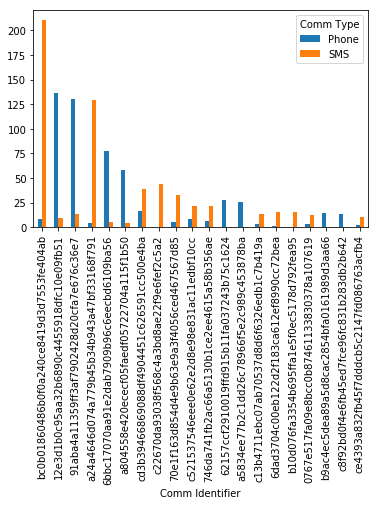

In [172]:
Comms = df.groupby(["Comm Identifier","Comm Type"]).size().sort_values(ascending = False)

def addrows(row):
    return row["Phone"] + row["SMS"]

Comms2 = Comms.unstack()
Comms2 = Comms2.fillna(0)
Comms2["Total"] = Comms2.apply(addrows, axis=1)
Comms2 = Comms2.sort_values(["Total"], ascending = False)

Comms2[0:20].drop("Total", axis=1).plot(kind = "bar")

In [175]:
df_location = df[['Latitude','Longitude']] #all lat and long #.value_counts()
df_location

,Latitude,Longitude
0,-33.892933,151.202296
1,-33.892933,151.202296
2,-33.880329,151.205690
3,-33.880329,151.205690
4,-33.880329,151.205690
5,-33.884171,151.202350
6,-33.884171,151.202350
7,-33.892933,151.202296
8,-33.880329,151.205690
9,-33.880329,151.205690


In [85]:
type(df_location) #dataframe 

pandas.core.frame.DataFrame

In [153]:
df['LatLong'] = list(zip(df.Latitude,df.Longitude))
#this combines the two columns to make it a tuple which will be 
#easier to do test on (folium reads it better as a combined)
df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,LatLong
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,"(-33.89293336, 151.2022962)"
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,"(-33.89293336, 151.2022962)"
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"


In [162]:
df.groupby(["LatLong"]).count() #70 unique locations
# df_latlong = df["LatLong"].unique()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
LatLong,,,,,,,
"(-42.88481, 147.32748)",4,4,1,4,4,4,4
"(-42.88194, 147.32893)",15,15,2,15,15,15,15
"(-42.88101, 147.33346)",1,1,1,1,1,1,1
"(-42.88029, 147.32808)",4,4,1,4,4,4,4
"(-42.87457, 147.31788)",7,7,2,7,7,7,7
"(-42.8606, 147.4542)",3,3,1,3,3,3,3
"(-42.85984, 147.29215)",501,501,11,501,501,501,501
"(-42.85307, 147.31532)",197,197,6,197,197,197,197
"(-42.84338, 147.29569)",723,723,19,723,723,723,723


In [176]:
# map_all = folium.Map(location=[-33.892933,151.202296]) #testing map function
# map_all

In [167]:
map_all = folium.Map(location=[-33.892933, 151.202296]
                     )
folium.Marker([-33.892933, 151.202296]).add_to(map_all)
map_all

#above is the sample map, but with only one point
#need to make a function that will take each point and map it
#this would give us an idea of the radius of the individual 
#depending on these findings we would 

In [25]:
# map = folium.Marker([-33.892933,151.202296]).add_to()